In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir = glob.glob("./data/*.csv")

dfs = []

for file in data_dir:
    df = pd.read_csv(file)
    df["time_minutes"] = df["time_seconds"] / 60
    dfs.append(df)

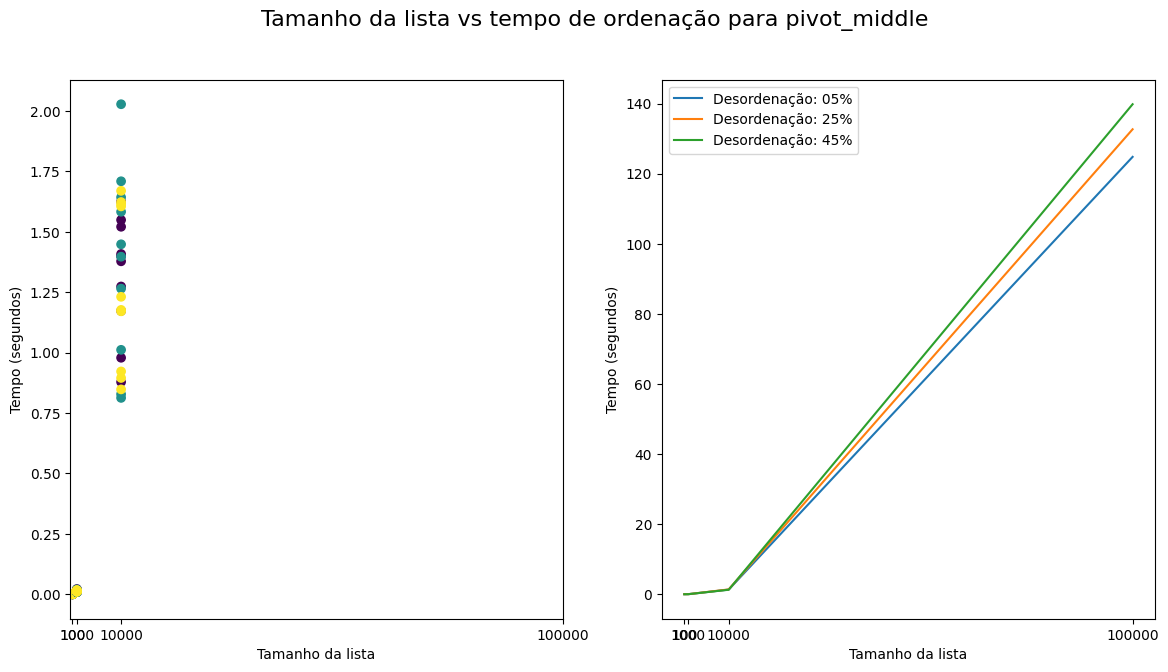

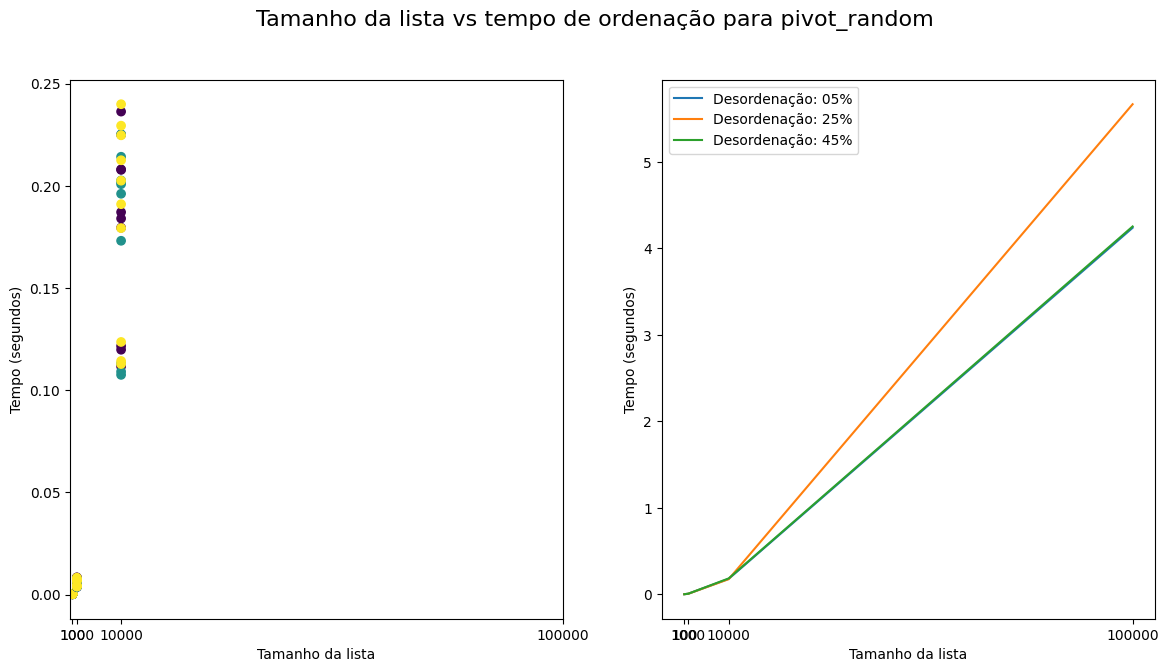

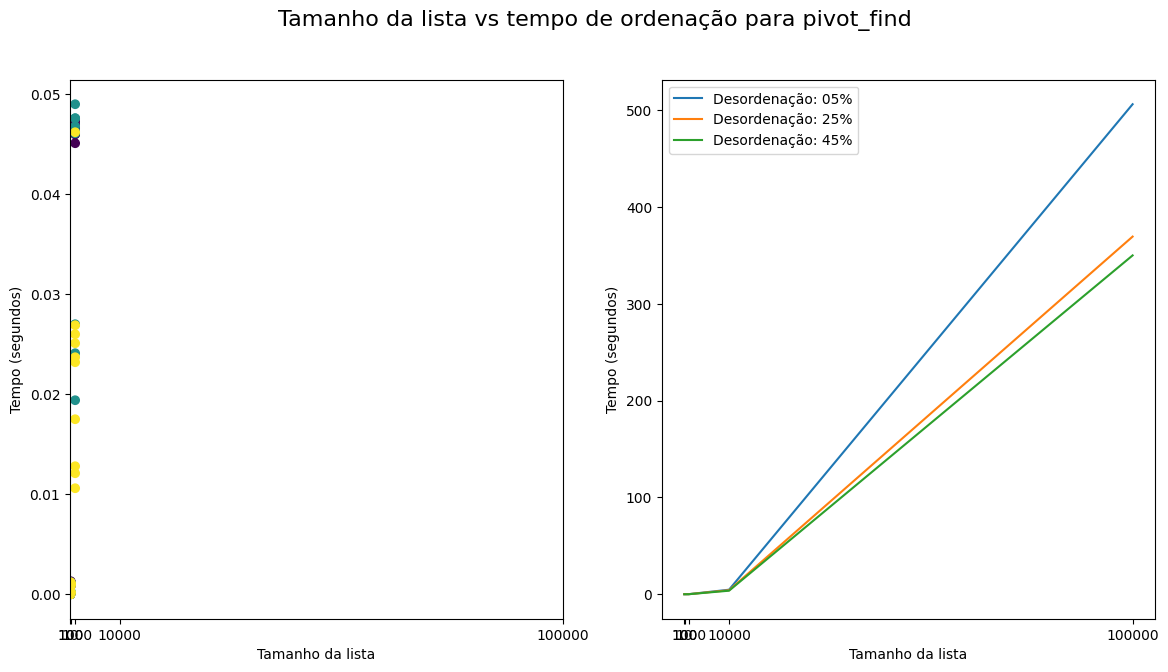

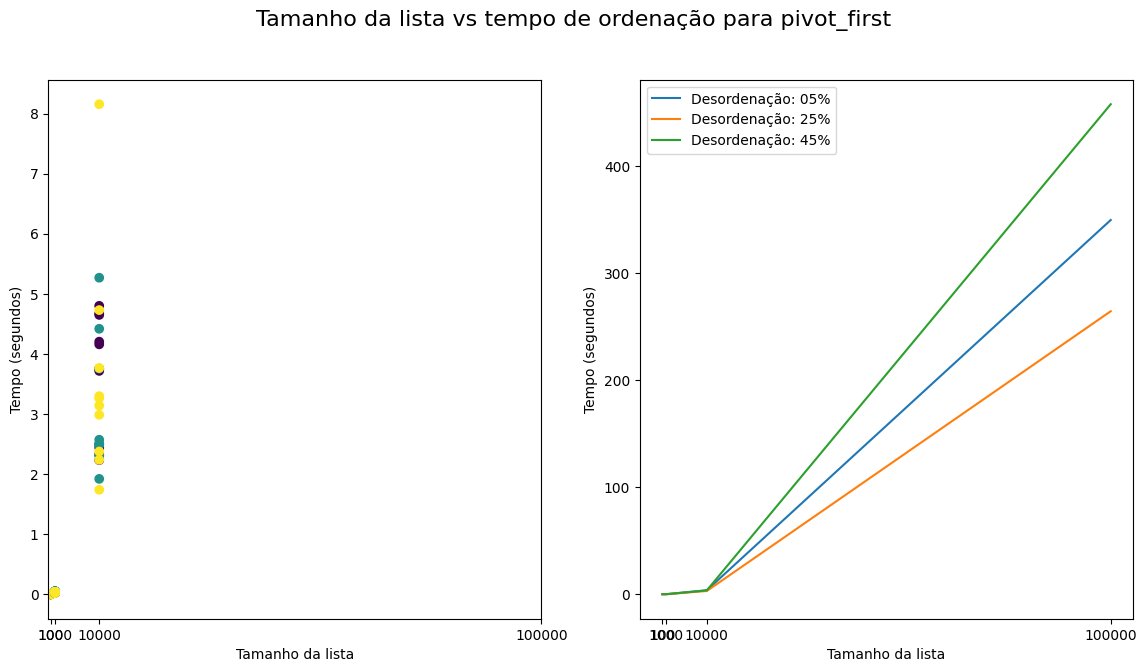

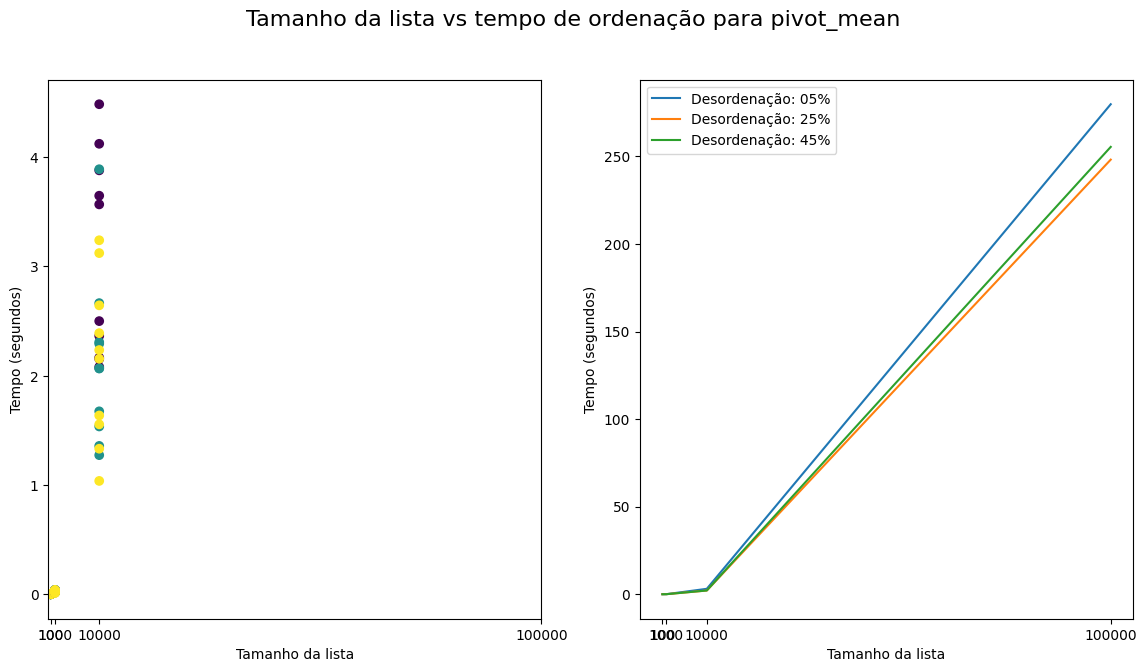

In [3]:
for df in dfs:
    tempo_medio = (
        df.groupby(["method", "list_size", "shuffle_percentage"])["time_seconds"]
        .mean()
        .reset_index()
    )
    list_sizes = tempo_medio["list_size"].unique()
    shuffle_percentages = tempo_medio["shuffle_percentage"].unique()

    figure, axis = plt.subplots(1, 2, figsize=(14, 7))

    for list_size, percentage in zip(list_sizes, shuffle_percentages):
        subset_size = df[df["list_size"] == list_size]
        subset_shuffle = tempo_medio[tempo_medio["shuffle_percentage"] == percentage]
        axis[0].scatter(
            x=subset_size["list_size"],
            y=subset_size["time_seconds"],
            c=subset_size["shuffle_percentage"],
        )
        axis[0].set_xlabel("Tamanho da lista")
        axis[0].set_ylabel("Tempo (segundos)")
        axis[0].set_xticks(tempo_medio["list_size"].unique())

        axis[1].plot(
            subset_shuffle["list_size"].values,
            subset_shuffle["time_seconds"].values,
            label=f"Desordenação: {percentage:02}%",
        )
        axis[1].set_xlabel("Tamanho da lista")
        axis[1].set_ylabel("Tempo (segundos)")
        axis[1].set_xticks(tempo_medio["list_size"].unique())

    plt.suptitle(
        t=f"Tamanho da lista vs tempo de ordenação para {df['method'][0]}", fontsize=16
    )
    plt.legend()
    plt.show()